# Data Visualization

Very little machine learning or data science takes place without visualizations. Visualizations help us comprehend our data, segment it, and eventually transform it in a way that allows ML algorithms to produce insights.

The fundamental visualizations are:

* [line charts](https://jakevdp.github.io/PythonDataScienceHandbook/04.01-simple-line-plots.html)
* [scatter plots](https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html)
* [bar charts](https://jakevdp.github.io/PythonDataScienceHandbook/04.03-errorbars.html)

Visualizations are useful in

* 2 dimensions
* [3 dimensions](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)
* [images](https://matplotlib.org/users/image_tutorial.html)

Visualizations are highlighted by

* [color](https://jakevdp.github.io/PythonDataScienceHandbook/04.07-customizing-colorbars.html)
* [axis size and spacing](https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html)
* [legends](https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html)
* [annotations](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html)
* [subplots](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html)

In this assignment, you will use visualizations to explore the titanic and okcupid datasets, looking for linear, polynomial, or gaussian-like relationships. Every other relationship looks like noise.

## Assignment

The following dataset contains a number of hidden functions. Use bar plots, scatter plots, and line plots to explore the dataset, looking for relationships. When you discover a relationship, you will know it.

It is possible to create a 2d graph for every pair of columns, and a 3d graph for every triple of columns. This would produce `10 choose 2` 2d graphs and `10 choose 3` 3d graphs. See if you can find the functions in this dataset through visualization. Make as many visualizations as you like.

# Thinking about your assignment

### What is this assignment asking for? What programming elements are required, like graphing, dataset manipulation, and intuition should I be looking for? What python functions will be require? Why is visualization important?

The purpose of this assignment is to uncover the internal structure of the data, in the form of correlations, or if possible, analytical relationships and proportionalities between the dimensions of the data. One way to think of this is supposing that the dimensions of the data are not independent, and thus any particular dimension may be dependent on some combination of other dimensions. In linear algebra, linear dependence would be implied by one dimension (which corresponds to either a column or row of a matrix representation of the data - in other words, a vector) being some linear combination of one or more other dimensions. More generally, the dependence can be nonlinear, and may be described by some function that contains more than first-order terms.

For data generated by real-world processes, some degree of noise is expected, which will lead to discrepancies between what a proposed relationship or proportionality predicts and what is observed. Many statistical tools can be used for quantifying the degree to which a proposed mathematical model describes what is observed. Furthermore, data can be generated from probability distributions, in which case the dimensions should be treated as random variables, and not as algebraic ones.

In this assignment, visualization shall be the tool of choice for interrogating the data and teasing out any internal dependencies and discovering if the forms of any data-generating mechanisms can be determined. Humans can detect deviations from straight lines to a surprising degree of accuracy. However, determining the exact form of nonlinear relationships can be difficult, and furthermore, if one dimension of the data is dependent on more than two other dimensions, this becomes difficult and often impractical to visualize. 

In practice, visualization is an essential tool that should be employed alongside statistical analyses and machine learning models in order to understand data. For this assignment, it will be used in isolation, but the perspective that normally it will be one step among many should be kept in mind.

_I will interchange referring to the different features of the data as columns, dimensions, and variables._

### Make a list of the first four steps I need to take in order to explore and solve this assignment:

1. Plot all pairwise relationships between the dimensions. Look for obvious correlations.

2. Find and record all relationships between pairs of dimensions that appear to be linear, polynomial, exponential, sinusoidal, or logarithmic.

3. Determine the shape of the distributions for each dimension.

4. Explore the more weakly correlated variables, and try some 3D plots.


### What do I want to have accomplished when I have finished this assignment?

I wish to have a collection of sentences of the form "x = f(y, z, ...)", where x, y, z, ... represent dimensions of the data and f is a function. Where a function cannot be determined, something to the effect of "x is positively/negatively correlated with y, ..." will suffice. To the extent that I can, I wish to unify pairwise relationships which are really products of a higher-dimensional dependency. If data is better explained as being sampled from a probability distribution, I will instead draw conclusions about the nature of this distribution, and how many dimensions appear to be sampled from it.


# Googling about your assignment

```
python bar chart
python scatter plot
python plotting dataset
matplotlib legend
matplotlib subplot
beautiful python graphs
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('https://www.dropbox.com/s/4jgheggd1dak5pw/data_visualization.csv?raw=1', index_col=0)
print(data.columns)
data.head()

# plot the data until you intuit information from it

Index(['arrow', 'under', 'interior', 'theta', 'amb', 'slice', 'delta', 'pi',
       'height', 'nu', 'night', 'dataset', 'length', 'twi', 'x', 'wind', 'y',
       'rho', 'alpha'],
      dtype='object')


arrow     under      interior         theta         amb  \
0  5718.086525 -1.614321  1.555158e+11  11213.081938   95.426020   
1  3230.167947  0.066989  1.853956e+12  21130.628512   12.420615   
2  7557.771756 -0.067705  8.501664e+10  13804.152665  152.939420   
3  6555.190363 -1.253076  1.194396e+12   7549.844014  457.351838   
4  3201.371780  0.327282  5.787566e+11  32745.773149  228.577117   

          slice       delta            pi        height            nu  \
0   7425.427256  -10.406357   9680.358706  7.120126e+06  1.546267e+07   
1  12649.208494 -115.874083   8052.298378  2.075786e+07  4.522003e+06   
2   9134.779756  -30.421137   1246.712864  1.078952e+07  6.069516e+06   
3   2475.142419 -129.555563   5177.525187  7.995510e+05  2.238686e+07   
4   1545.254659 -101.958575  14579.206899  3.122909e+05  5.824294e+07   

       night       dataset    length          twi          x          wind  \
0   7.240413   9850.207734  0.743258  1490.775204   9.659253   9175.438093   
1  10.999659  10969.549522 -0.553688   838.891244   9.635378   5166.583785   
2  11.991673   4253.498794 -0.201762   462.904173  10.522631  12130.240191   
3  11.507596   5478.190397 -0.153284   361.526737  10.371287  10540.522103   
4   8.458106   6334.157647  0.213162   677.949043  11.476100   5132.024696   

           y           rho       alpha  
0  -6.254395  1.291731e+23  437.103839  
1 -88.489405  9.618581e+21  307.629683  
2 -36.244784  3.233375e+19  400.425188  
3 -67.820561  2.021548e+22  671.267621  
4 -42.244775  9.174238e+19  491.662760

In [0]:
# additional libraries
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d
import seaborn as sns
sns.set()

# Visualize your result

Draw a single plot containing multiple datasets in different colors and styles. You can use subplots, different colors and symbols, and one or more legends to create an attractive plot. Summarize any knowledge you have gained about the dataset verbally.

## Standardizing

So that all data is on the same scale, I will standardize using sklearn so that each dimension has unit variance and mean 0.


In [3]:
data_u = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns)
data_u.head()

arrow     under  interior     theta       amb     slice     delta  \
0  0.109632 -1.581336 -0.657415 -0.860830 -1.103952  0.150688  0.351348   
1 -0.692817  0.065158  2.570035 -0.091799 -1.685785  1.473976 -1.584715   
2  0.703002 -0.066747 -0.791380 -0.659912 -0.700807  0.583701 -0.016062   
3  0.379631 -1.227571  1.316710 -1.144886  1.432996 -1.103317 -1.835864   
4 -0.702105  0.320061  0.146846  0.808868 -0.170619 -1.338876 -1.329269   

         pi    height        nu     night   dataset    length       twi  \
0  0.555989 -0.131501 -0.475632 -1.387172  0.860830  0.791052  1.707018   
1  0.171473  1.760553 -1.121353  0.562244  1.155278 -0.534907  0.224315   
2 -1.435871  0.377579 -1.030018  1.076669 -0.611414 -0.175109 -0.630865   
3 -0.507491 -1.008396 -0.066964  0.825643 -0.289253 -0.125547 -0.861447   
4  1.712999 -1.075997  2.049272 -0.755718 -0.064086  0.249097 -0.141747   

          x      wind         y       rho     alpha  
0 -0.182927  0.109119  0.752725  1.732200 -0.202595  
1 -0.196347 -0.694553 -1.715891 -0.412200 -0.648052  
2  0.302397  0.701481 -0.147558 -0.584145 -0.328788  
3  0.217324  0.382783 -1.095432 -0.222128  0.603048  
4  0.838364 -0.701481 -0.327672 -0.583079 -0.014884

## Pairwise Plots

With 19 features, or dimensions, there are ${19\choose2} = 171$ different combinations of 2 columns.

In [4]:
data_u.shape

(1000, 19)

In [0]:
def enumerate_combinations(items):
    """Produce all possible pairwise-combinations of a set of items 
    
    Args:
        items (list): the items to enumerate the 2-element combinations of
        
    Returns:
        A list of pairwise combinations of the items
    """
    indices = range(len(items))
    all_combinations = [(items[i], items[j]) for i in indices for j in indices if i < j]
    
    return all_combinations

In [6]:
combination_groups = enumerate_combinations(data_u.columns)
print(combination_groups[0:5])
print(combination_groups[-5:])

[('arrow', 'under'), ('arrow', 'interior'), ('arrow', 'theta'), ('arrow', 'amb'), ('arrow', 'slice')]
[('wind', 'rho'), ('wind', 'alpha'), ('y', 'rho'), ('y', 'alpha'), ('rho', 'alpha')]


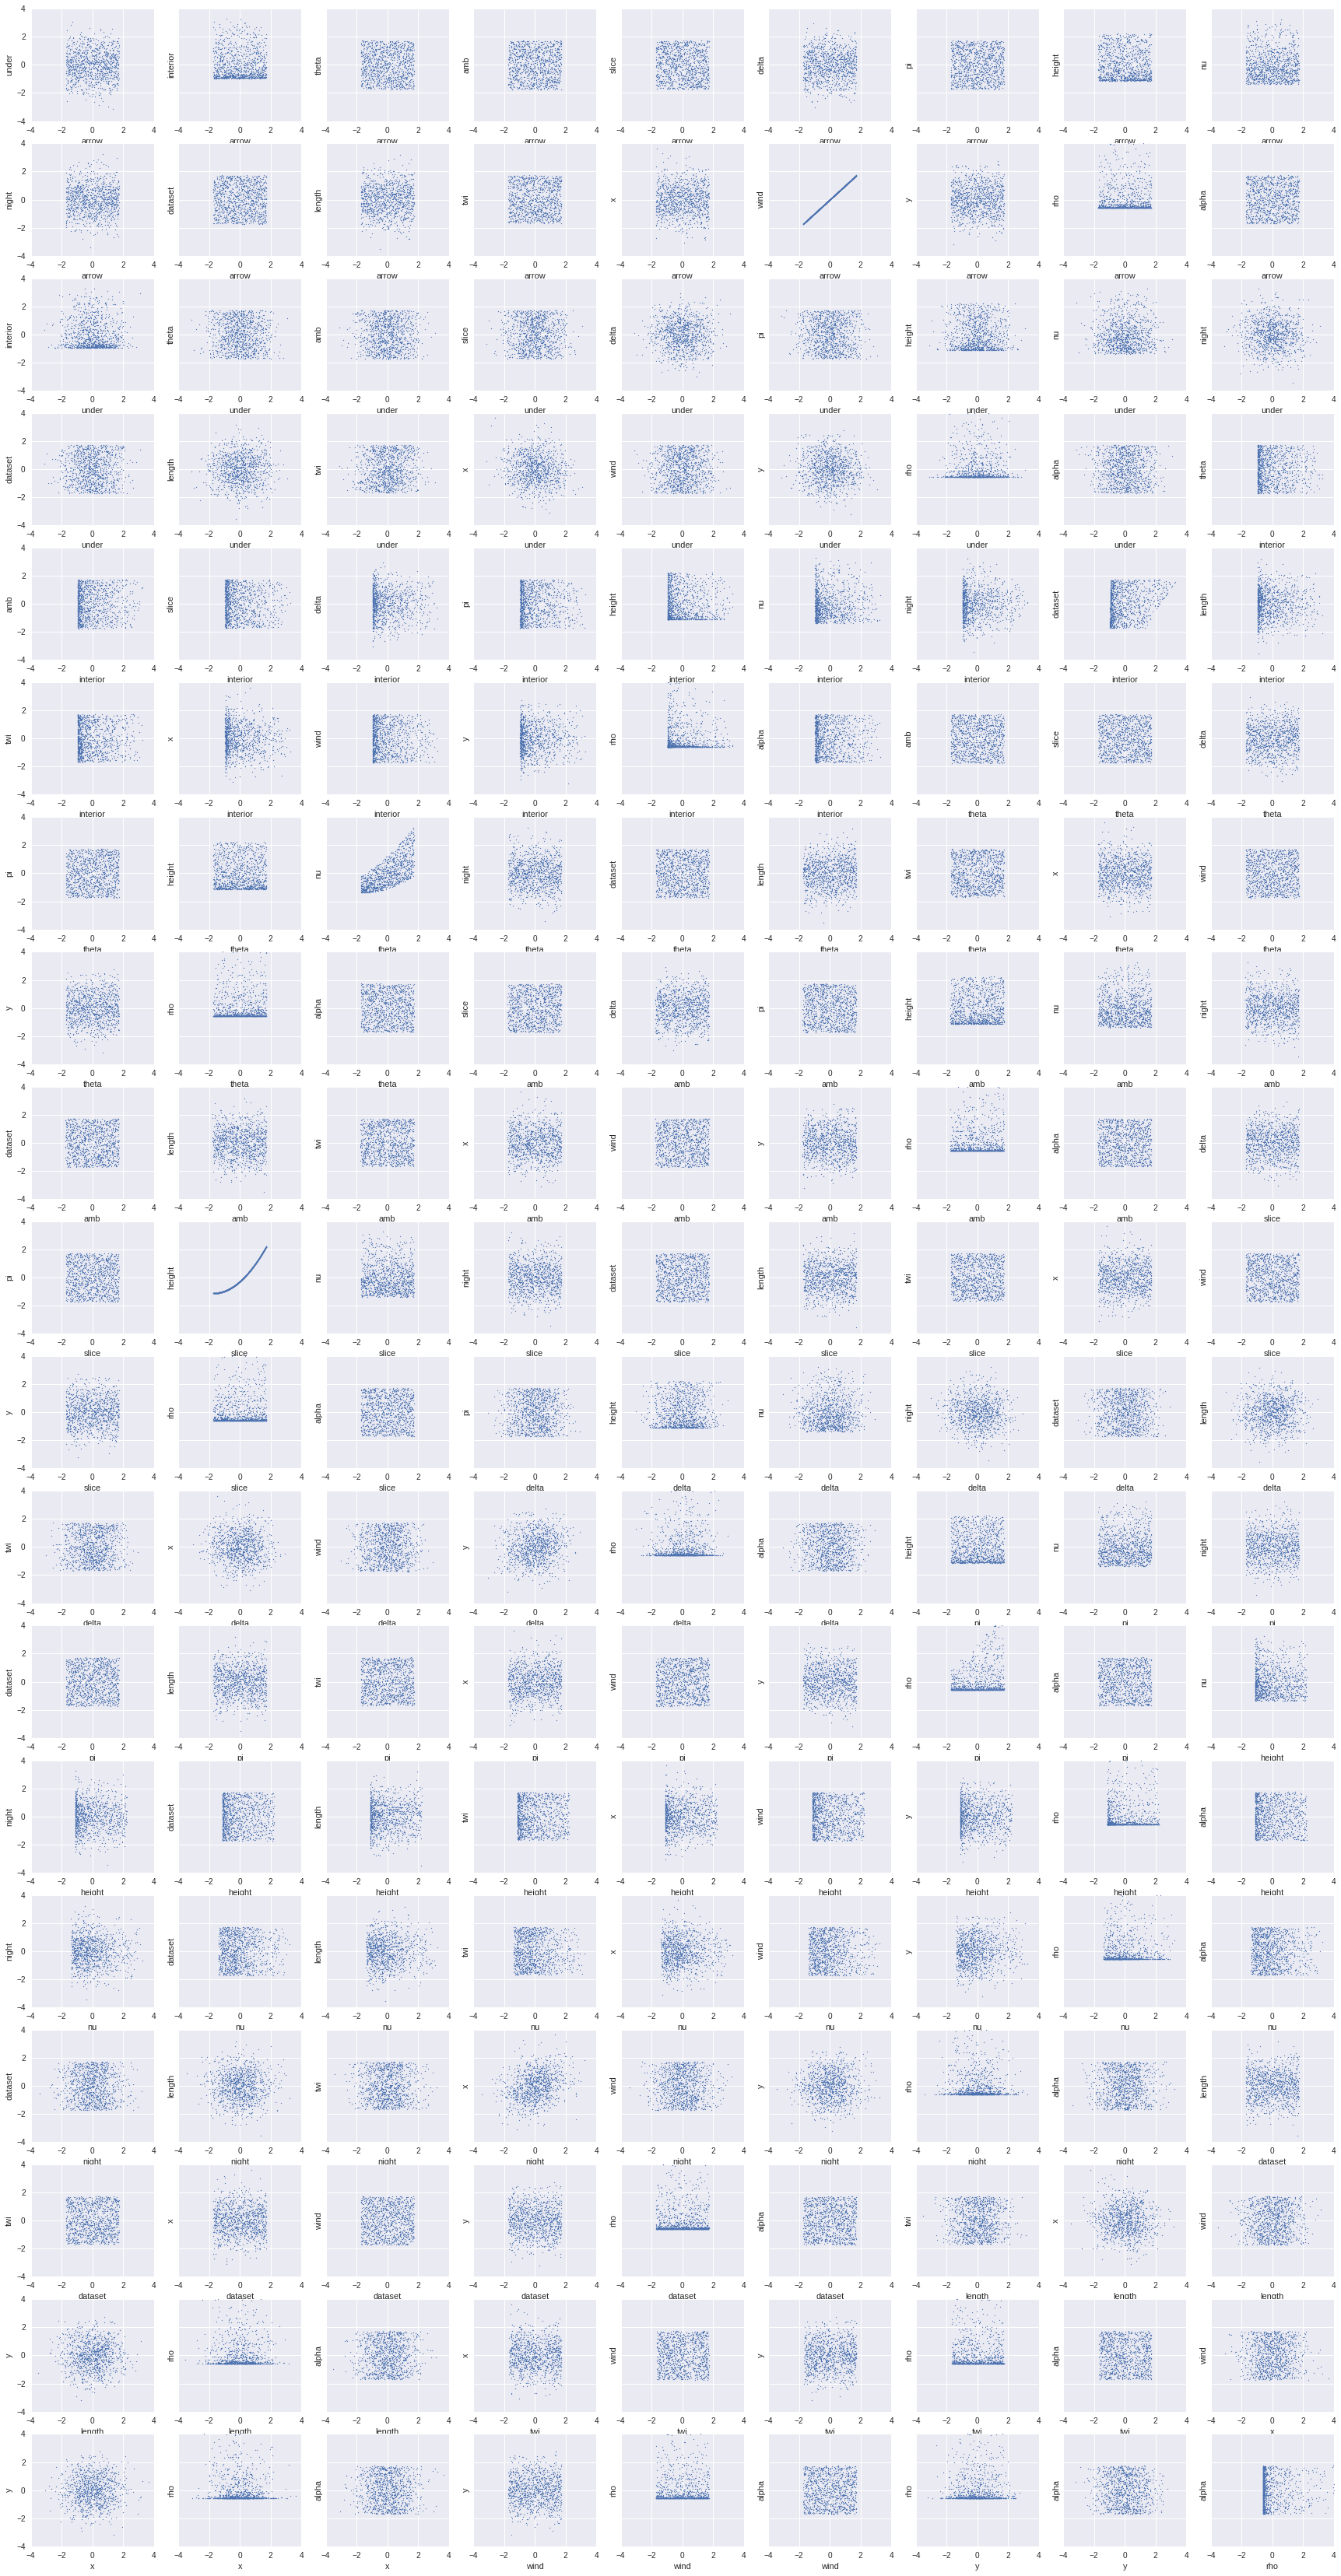

In [7]:
# scatter plots

fig, axarr = plt.subplots(19, 9, sharey='row', figsize=(30, 60))

for tx, ax in zip(range(len(combination_groups)), axarr.flat):
    
    ax.scatter(data_u[combination_groups[tx][0]], data_u[combination_groups[tx][1]], s=1)
    ax.set(xlabel=combination_groups[tx][0], ylabel=combination_groups[tx][1],
          xlim=(-4, 4), ylim=(-4, 4))

## Initial Analysis

### Obvious relationships

* `"wind"` and `"arrow"` are have a linear relationship, one can be described as a linear function of the other
* `"height"` and `"slice"` has a curved relationship; one can be described as a nonlinear function of the other

### Distributions, ranges of values

The variables are all distributed in one of the following manners: uniformly distributed, symmetrically distributed with more probability density in the center (Gaussian-esque), and asymmetrically distributed with more probability density at lower x (positively skewed). Interestingly, no variables were negatively skewed.

__Uniform__
* `"arrow"`
* `"theta"`
* `"amb"`
* `"slice"`
* `"pi"`
* `"dataset"`
* `"twi"`
* `"wind"`

__Gaussian__
* `"under"`
* `"delta"`
* `"right"`
* `"length"`
* `"x"`
* `"y"`

__Positively Skewed__
* `"interior"`
* `"height"`
* `"nu"`
* `"rho"`

### Analysis

That a variable is distributed in a certain way does not imply that it is generated through sampling from that distribution. In the case of a uniformly distributed variable, it can be produced through randomly sampling, through taking equally spaced values that span an interval as in `np.linspace`, or by being a function of another uniformly distributed variable. For example, both wind and arrow are uniformly distributed, even though one is a function of the other (it could be either because the function is invertible).

In the case of height and slice, it seems likely that the skewed distribution of height is due to it being a nonlinear function of slice - which is distributed uniformly. The function is curved upward, and so will have more points with lower values as a result of this and the uniform distribution of the domain values sampled.

### Correlation 

By inspection:
* `"nu"` and `"theta"` are positively correlated
* `"x"` and `"night"` are weakly negatively correlated
* `"rho"` and `"pi"` are weakly positively correlated

We can visualize the correlations between variables with a heatmap.


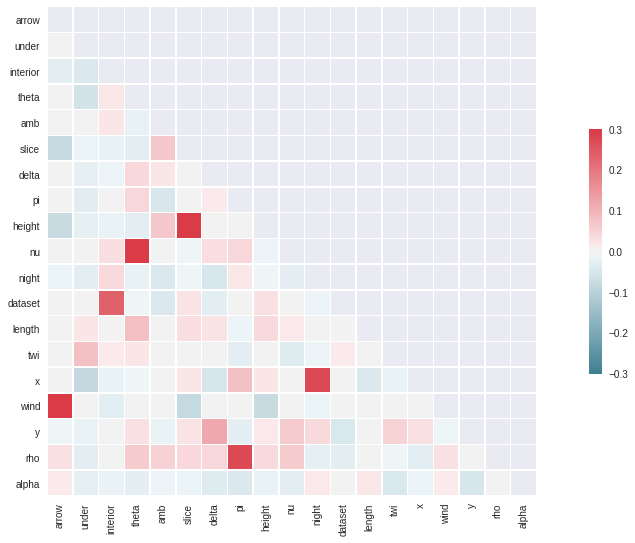

In [8]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(19, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

The heatmap confirms the correlations we observed above, with one addition:

* `"interior"` and `"dataset"` are weakly correlated

## Gaussians

In order to see if any of the dimensions distributed in a Gaussian-like manner come from higher-dimensional distributions, I will work with the unstandardized data.

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


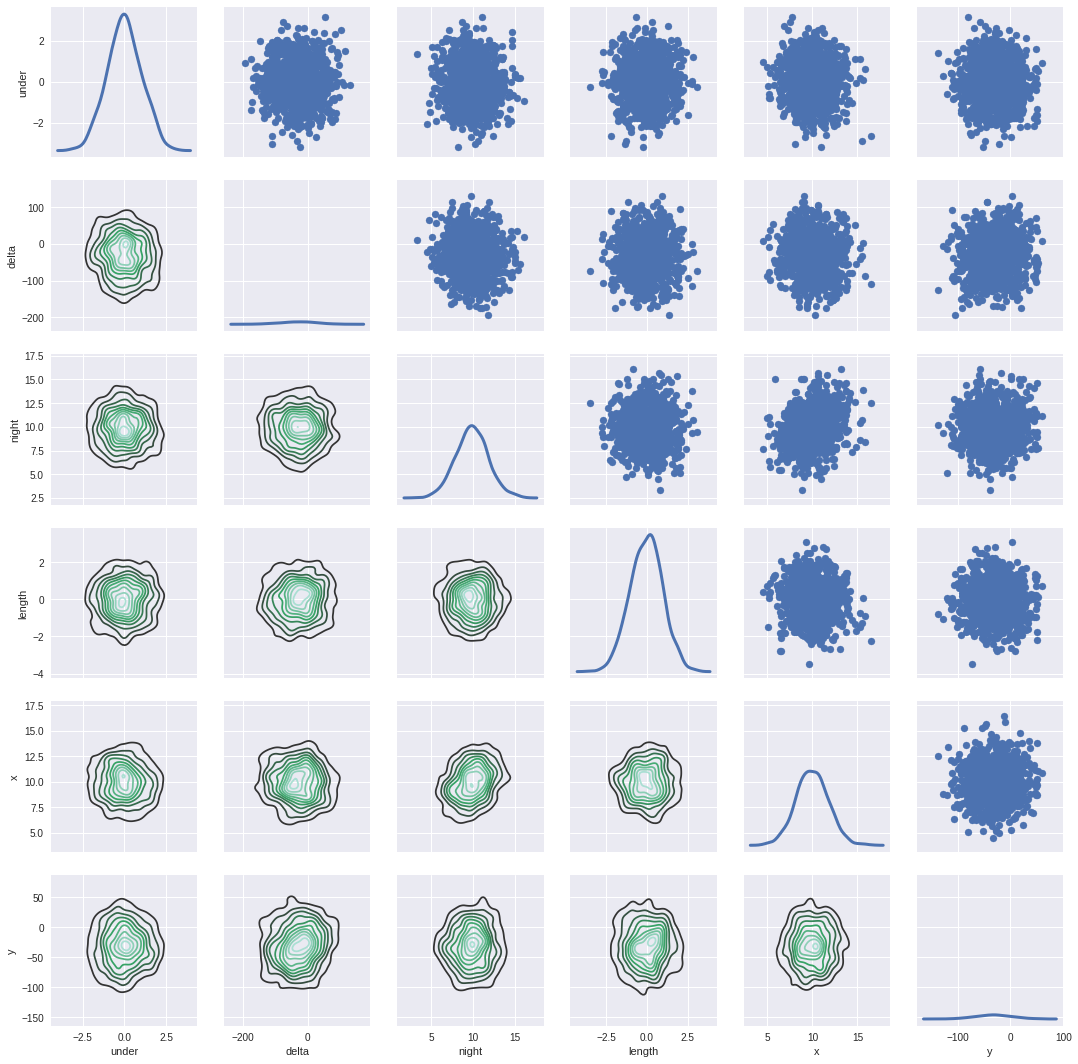

In [9]:
data_g = pd.DataFrame(data, columns=['under', 'delta', 'night', 'length', 'x', 'y'])

g = sns.PairGrid(data_g)
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)
g = g.map_diag(sns.kdeplot, lw=3, legend=False);

It may be the case that certain pairs of dimensions have had their values sampled from a single 2-dimensional Gaussian distribution. If this is the case, then we would expect them to be correlated if the covariance matrix of the distribution had nonzero entries on the off-diagonals. Visually, this would correspond to seeing elliptical contours rotated at some acute angle off the x axis. From the pairwise contour plots of the dimensions with Gaussian distributions, we find:

* `"x"` and `"night"` may be sampled from a 2D Gaussian with nonzero off-diagonals in its covariance matrix
* `"y"` and `"delta"` may be sampled from a 2D Gaussian with very slightly nonzero off-diagonals in its covariance matrix

No other combinations of dimensions would be explained by a 2D Gaussian with covariance matrices containing nonzero off-diagonals. If they are sampled from higher dimensional Gaussians, then the associated covariance matrices would only have nonzero diagonal elements.

However, there is another argument in favor of the 6 dimensions with Gaussian distributions being sampled from 3 2-dimensional Gaussians. Certain variable pairs have the same length scales, and their 1-dimensional distributions have extremely similar shapes, as would be expected when taking slices through symmetrical Gaussian surfaces. These pairs are:

* `"x"` and `"night"`
* `"y"` and `"delta"`
* `"under"` and `"length"`

## Correlated Dimensions

Now we take a look at those dimensions that were found to have pairwise correlations, and also examine those with skewed distributions which may be an indicator of some relationship

Recall:
* `"wind"` and `"arrow"` are have a linear relationship, one can be described as a linear function of the other
* `"height"` and `"slice"` has a curved relationship; one can be described as a nonlinear function of the other
---
* `"nu"` and `"theta"` are positively correlated
* `"x"` and `"night"` are weakly negatively correlated
* `"rho"` and `"pi"` are weakly positively correlated
* `"dataset"` and `"interior"`are weakly correlated
---
* `"interior"`, `"height"`, `"nu"`, and `"rho"` have skewed distributions

In our analysis we could explain the skewed distribution along `"height"` by observing that if `"slice"` were to be uniformly distributed, then if `"height"` was a function of `"slice"` that curved upward (positive second derivative), it would be observed to be positively skewed as a result.

Applying this same reasoning to our observed correlations and variables with positively skewed distributions, we hypothesize:

* `"interior"` is a function of `"dataset"` with positive second derivative
* `"nu"` is a function of `"theta"` with positive second derivative
* `"rho"` is a function of `"pi"` with positive second derivative

The correlation between `"x"` and `"night"` was already shown to be due to them being sampled from a multivariate Gaussian with nonzero off-diagonal covariance matrix elements. We can once again work with the unstandardized data in order to see if corresponding length scales can be used as additional evidence for a relationship.

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


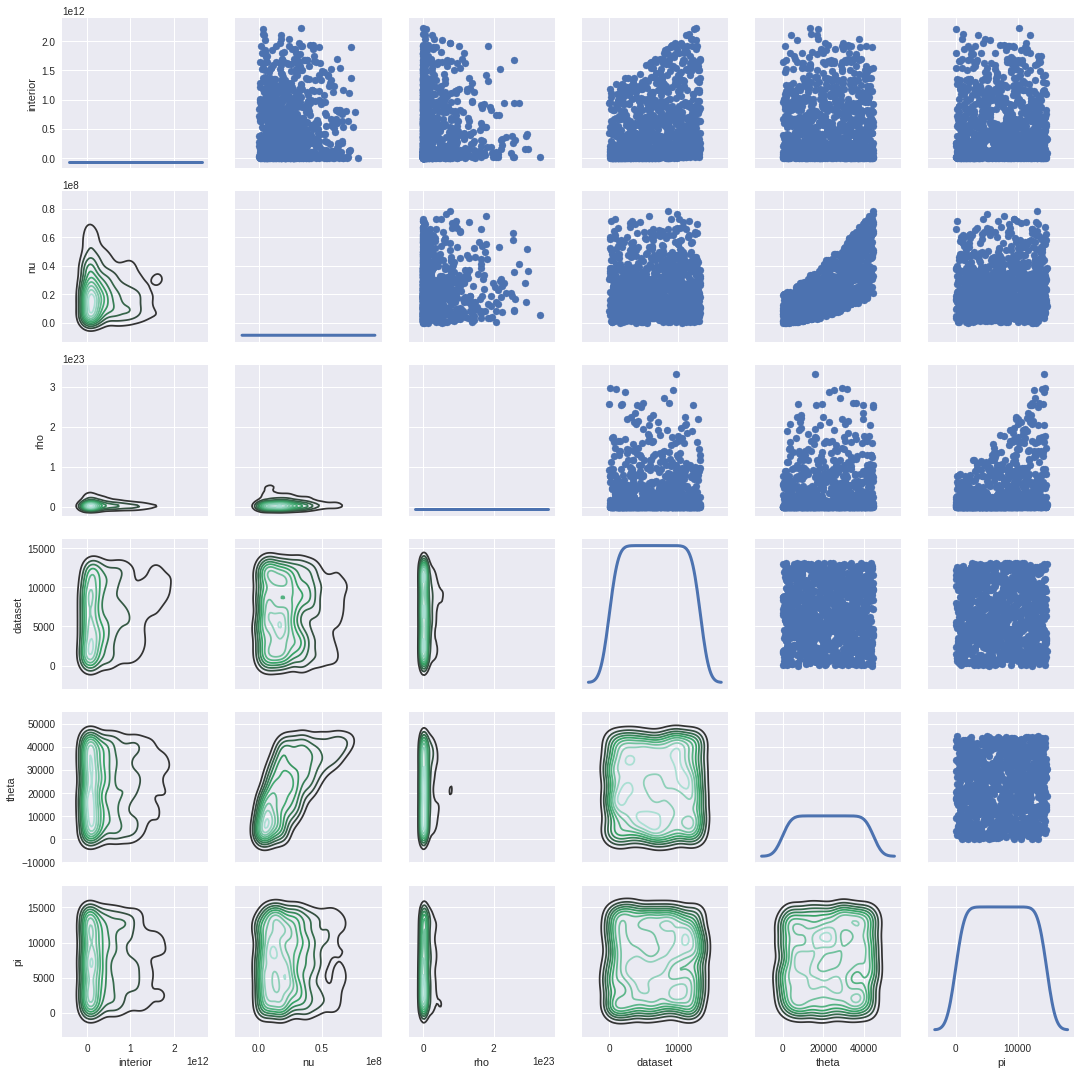

In [10]:
data_c = pd.DataFrame(data, columns=['interior', 'nu', 'rho', 'dataset', 'theta', 'pi'])

g = sns.PairGrid(data_c)
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)
g = g.map_diag(sns.kdeplot, lw=3, legend=False);

## Exploring 3D Plots

I will further examine the dimensions with strong pairwise correlations to see if any particular dimension is a function of 2 others.

In [0]:
def enumerate_3_combinations(items):
    """Produce all possible pairwise-combinations of a set of items 
    
    Args:
        items (list): the items to enumerate the 3-element combinations of
        
    Returns:
        A list of 3-element combinations of the items
    """
    indices = range(len(items))
    all_combinations = [(items[i], items[j], items[k]) for i in indices for j in indices for k in indices if (i < j and j < k)]
    
    return all_combinations

In [0]:
combination_groups3 = enumerate_3_combinations(data_c.columns)

In [13]:
print(combination_groups3[0:10])
print(combination_groups3[-10:])
print(len(combination_groups3))

[('interior', 'nu', 'rho'), ('interior', 'nu', 'dataset'), ('interior', 'nu', 'theta'), ('interior', 'nu', 'pi'), ('interior', 'rho', 'dataset'), ('interior', 'rho', 'theta'), ('interior', 'rho', 'pi'), ('interior', 'dataset', 'theta'), ('interior', 'dataset', 'pi'), ('interior', 'theta', 'pi')]
[('nu', 'rho', 'dataset'), ('nu', 'rho', 'theta'), ('nu', 'rho', 'pi'), ('nu', 'dataset', 'theta'), ('nu', 'dataset', 'pi'), ('nu', 'theta', 'pi'), ('rho', 'dataset', 'theta'), ('rho', 'dataset', 'pi'), ('rho', 'theta', 'pi'), ('dataset', 'theta', 'pi')]
20


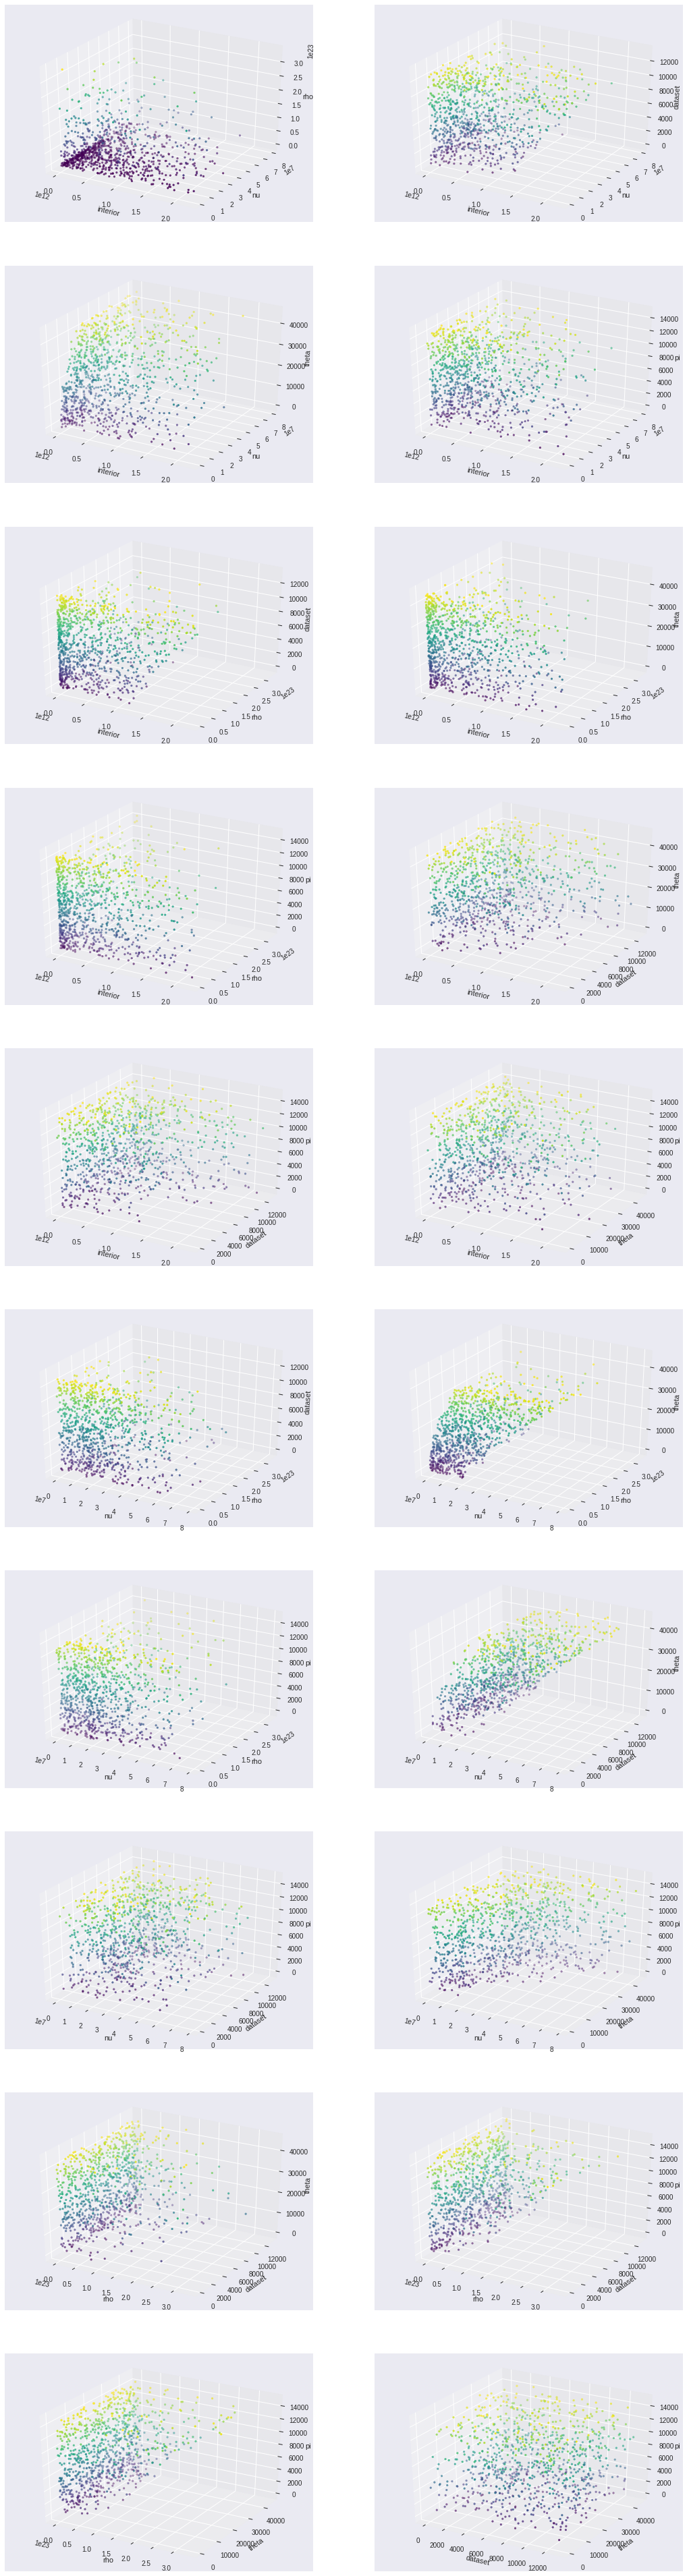

In [14]:
fig = plt.figure(figsize=(18, 70))

for tx in range(len(combination_groups3)):
    x, y, z = (combination_groups3[tx][0], combination_groups3[tx][1], combination_groups3[tx][2])
    
    ax = fig.add_subplot(10, 2, tx+1, projection='3d')
    ax.scatter(data_c[x], data_c[y], data_c[z], s=8, 
              c=data_c[z], cmap='viridis')
    
    ax.set(xlabel=x, ylabel=y, zlabel=z)

It is difficult to see relationships following multivariable functions using scatterplots. However, they do allow for noticing when points seem to be distributed fairly uniformly, or otherwise without interesting structure. By studying the above 20 plots, we observe that `"dataset"`, `"theta"`, and `"pi"` truly are independent. This supports the idea that at least one of these variables is in the domains of each of the functions that produce `"interior"`, `"nu"`, and `"rho"`

## Summary of Found Relationships

* `"wind"` and `"arrow"` are directly proportional
* `"height"` is a nonlinear function of `"slice"`
* `"x"` and `"night"` are drawn from a multivariate Gaussian distribution
* `"y"` and `"delta"` are drawn from a multivariate Gaussian distribution
* `"under"` and `"length"` are drawn from a multivariate Gaussian distribution
* `"interior"` is a nonlinear, noisy function of `"dataset"`
* `"nu"` is a nonlinear, noisy function of `"theta"` 
* `"rho"` is a nonlinear, noisy function of `"pi"`

# Stretch goal

So, you found all of the relationships in the toy dataset! Try doing the same thing with the titanic set and okcupid. Use categorical data as color indices into your graph! You can plot all three ticket classes aboard the titanic using the same graph to gain even deeper intuitions.

In [0]:
titanic = sns.load_dataset('titanic')

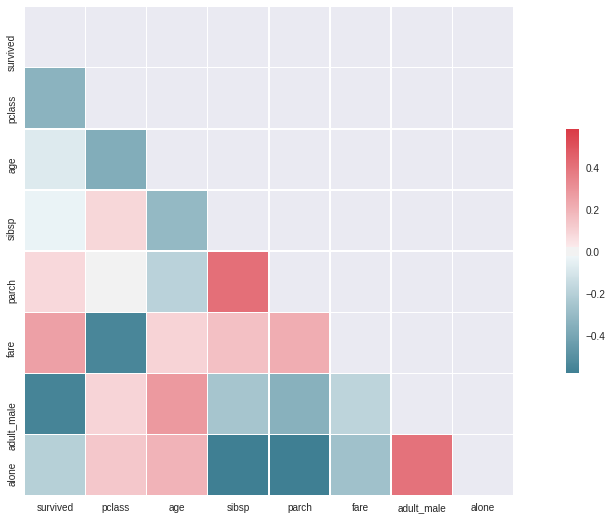

In [16]:
# Compute the correlation matrix
corr = titanic.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(19, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [17]:
corr

survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


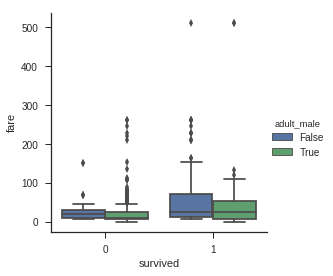

In [29]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("survived", "fare", "adult_male", data=titanic, kind="box")
    g.set_axis_labels("survived", "fare");

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


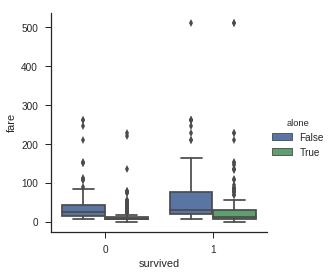

In [35]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("survived", "fare", "alone", data=titanic, kind="box")
    g.set_axis_labels("survived", "fare");